In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [110]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
df = df.dropna(0, 'all')
df

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [112]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [113]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dependent/target variable is charges. 

We want to predict the charges of the insurance policies based on the independent variables age, sex, bmi, children, smoker, region. 

Correlation matrix: **not only the independent variables**

In [114]:
corrM = df.corr()

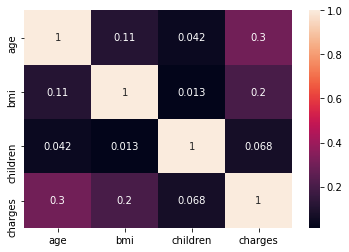

In [115]:
sns.heatmap(corrM, annot=True)
plt.show()

There is no "sex" feature because it is not a numerical variable. We don't see any correlations between variables. 

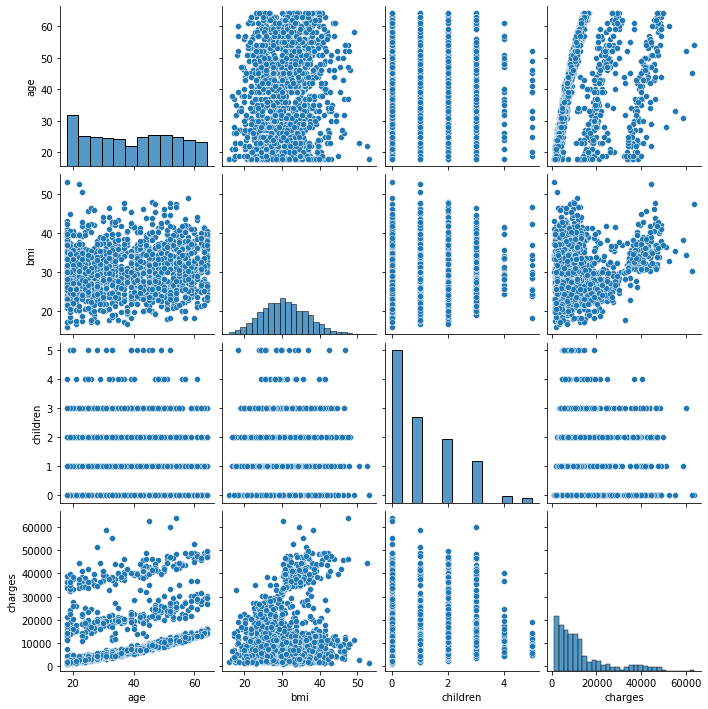

In [69]:
p=sns.pairplot(df)

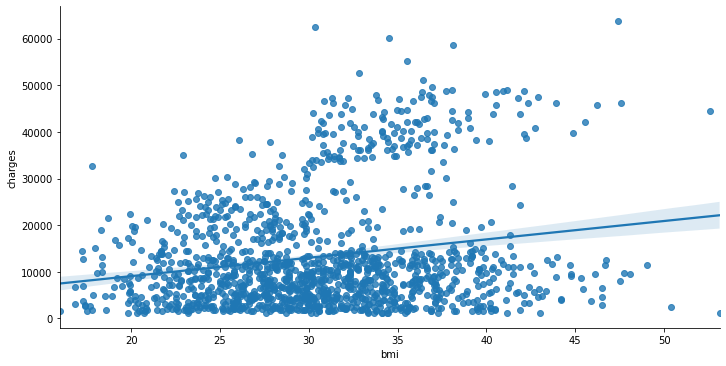

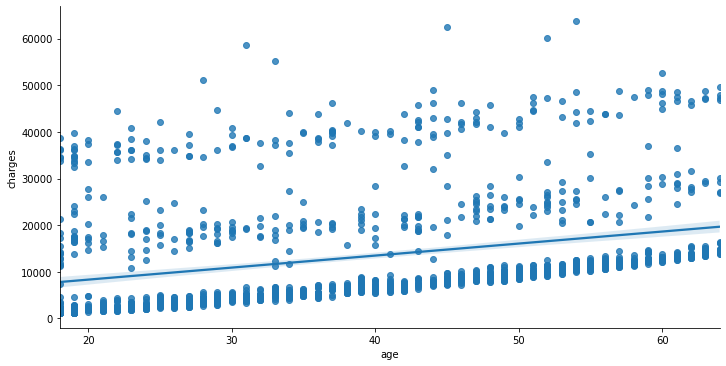

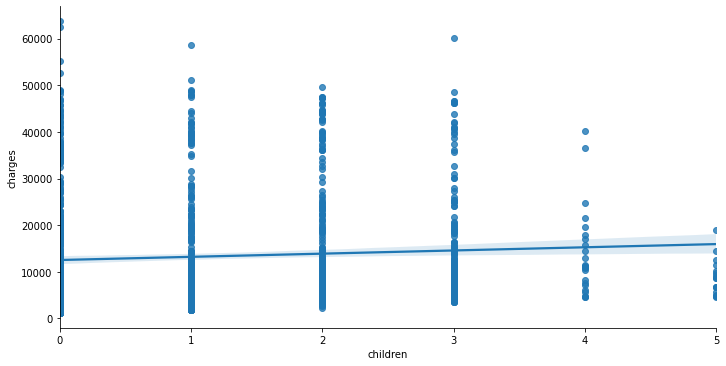

In [71]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2)

sns.lmplot(x='age', y='charges', data=df, aspect=2)

sns.lmplot(x='children', y='charges', data=df, aspect=2)

#sns.lmplot(x='sex', y='charges', data=df, aspect=2)

plt.show()

Text(0.5, 1.0, 'Histogram of the log of Charges')

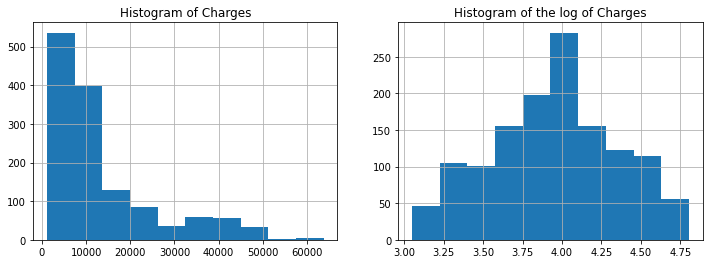

In [73]:
f = plt.figure(figsize = (12, 4))

ax = f.add_subplot(121)
df.charges.hist()
ax.set_title('Histogram of Charges')

ax = f.add_subplot(122)
np.log10(df.charges).hist()
ax.set_title('Histogram of the log of Charges')

### One-Hot Encoding

In linear regression, we need to have dummy variables, e.g., categorical variables. 

In [116]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix ='cat', prefix_sep='_', 
                          columns=categorical_columns,
                          drop_first=True,
                          dtype='int8')

In [117]:
df_encode.keys()

Index(['age', 'bmi', 'charges', 'cat_male', 'cat_1', 'cat_2', 'cat_3', 'cat_4',
       'cat_5', 'cat_yes', 'cat_northwest', 'cat_southeast', 'cat_southwest'],
      dtype='object')

In [118]:
df_encode

,age,bmi,charges,cat_male,cat_1,cat_2,cat_3,cat_4,cat_5,cat_yes,cat_northwest,cat_southeast,cat_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


We want to transform non-normal **dependent variables** into a normal shape. <br>
As seen on the histograms, the data is log-normal, so for this case we can use the Box-Cox transformation. 

In [119]:
from scipy.stats import boxcox
y_bc, l, ci = boxcox(df_encode['charges'], alpha = 0.05)

In [120]:
y_bc

array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
        9.01913128, 12.9736611 ])

In [121]:
l

0.043649053770664956

In [122]:
ci

(-0.01140290617294196, 0.0988096859767545)

In [123]:
df_encode['charges'] = np.log(df_encode['charges'])

In [124]:
df_encode

,age,bmi,charges,cat_male,cat_1,cat_2,cat_3,cat_4,cat_5,cat_yes,cat_northwest,cat_southeast,cat_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,9.268661,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,7.698927,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,7.396233,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,7.604867,0,0,0,0,0,0,0,0,0,1


Another way is to use the Standard Scaler from sklearn. 

In [78]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

numericals = pd.DataFrame(sc_X.fit_transform(df_encode[['age', 
                                                       'bmi']]), 
                                            columns=['age', 'bmi'],
                                            index = df_encode.index)

numericals.head()




,age,bmi
0,-1.438764,-0.453320
1,-1.509965,0.509621
2,-0.797954,0.383307
3,-0.441948,-1.305531
4,-0.513149,-0.292556


In [125]:
df_encode_scaled = df_encode.copy(deep=True)
df_encode_scaled[['age', 'bmi']] = numericals[['age', 'bmi']]
df_encode_scaled.head()

,age,bmi,charges,cat_male,cat_1,cat_2,cat_3,cat_4,cat_5,cat_yes,cat_northwest,cat_southeast,cat_southwest
0,-1.438764,-0.453320,9.734176,0,0,0,0,0,0,1,0,0,1
1,-1.509965,0.509621,7.453302,1,1,0,0,0,0,0,0,1,0
2,-0.797954,0.383307,8.400538,1,0,0,1,0,0,0,0,1,0
3,-0.441948,-1.305531,9.998092,1,0,0,0,0,0,0,1,0,0
4,-0.513149,-0.292556,8.260197,1,0,0,0,0,0,0,1,0,0


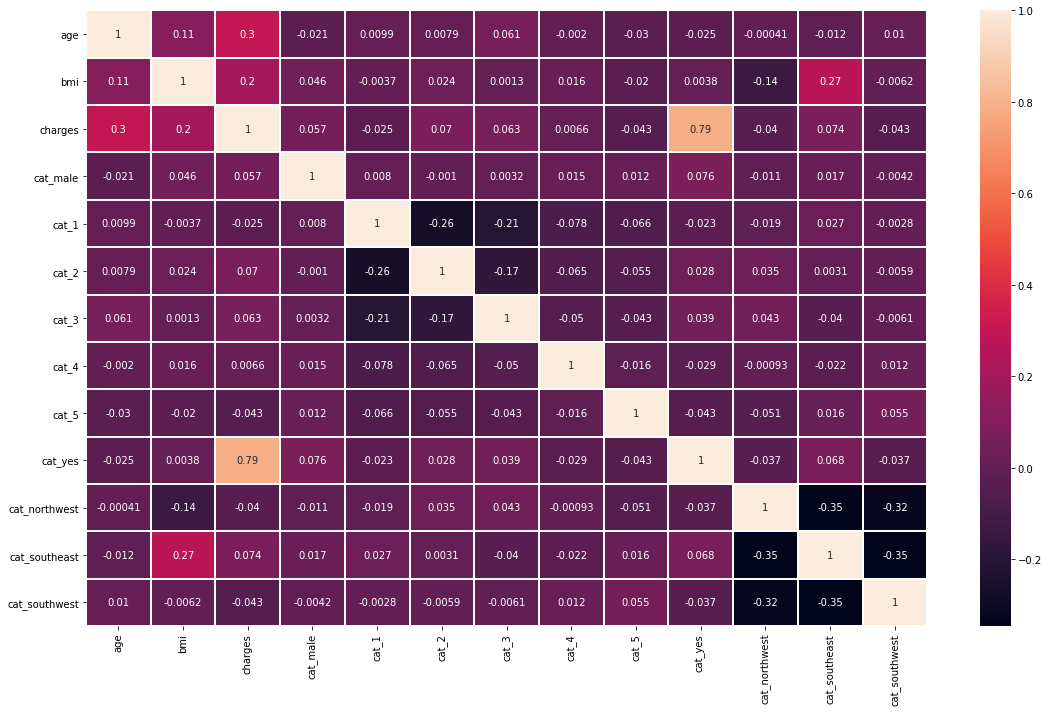

In [87]:
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_encode_scaled.corr(), annot=True, linewidths=2)
plt.tight_layout()

Now select the training and testing sets (with the box cox transformation). 

In [128]:
X = df_encode.drop('charges', axis=1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=2022)

In [129]:
X_train

,age,bmi,cat_male,cat_1,cat_2,cat_3,cat_4,cat_5,cat_yes,cat_northwest,cat_southeast,cat_southwest
568,49,31.900,0,0,0,0,0,1,0,0,0,1
565,19,30.495,0,0,0,0,0,0,0,1,0,0
869,25,24.300,0,0,0,1,0,0,0,0,0,1
1179,31,29.810,1,0,0,0,0,0,1,0,1,0
622,49,21.300,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240,23,36.670,0,0,1,0,0,0,1,0,0,0
624,59,28.785,1,0,0,0,0,0,0,1,0,0
173,35,34.800,0,1,0,0,0,0,0,0,0,1
1244,18,33.330,1,0,0,0,0,0,0,0,1,0


In [131]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [133]:
print('Linear Regression Coefficients: \n', linreg.coef_)
print('')

Linear Regression Coefficients: 
 [ 0.03364707  0.01133411 -0.06440132  0.15067442  0.27819542  0.21976258
  0.55666938  0.3960994   1.53009387 -0.03224505 -0.13251565 -0.09548079]



The summaries are easier to read in statsmodel:

In [93]:
import statsmodels.api as sm

In [96]:
X_train_ = sm.add_constant(X_train, prepend = False)

ols = sm.OLS(y_train, X_train_).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     216.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          2.98e-258
Time:                        09:16:58   Log-Likelihood:                -9487.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     923   BIC:                         1.906e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age             244.3798     14.414     16.955      0.000     216.093     272.667
bmi             303.5582     34.480      8.804      0.000     235.890     371.226
cat_male       -242.7779    404.345     -0.600      0.548   -1036.320     550.765
cat_1           567.8304    510.166      1.113      0.266    -433.390    1569.051
cat_2          1923.6328    564.964      3.405      0.001     814.870    3032.396
cat_3           629.8040    690.543      0.912      0.362    -725.413    1985.021
cat_4          3526.0317   1411.663      2.498      0.013     755.589    6296.474
cat_5           691.8790   1682.916      0.411      0.681   -2610.907    3994.665
cat_yes        2.368e+04    505.676     46.830      0.000    2.27e+04    2.47e+04
cat_northwest  -161.9170    576.693     -0.281      0.779   -1293.699     969.865
cat_southeast -1096.8967    586.096     -1.872      0.062   -2247.133      53.339
cat_southwest  -860.8045    581.586     -1.480      0.139   -2002.189     280.580
const         -1.038e+04   1208.809     -8.585      0.000   -1.28e+04   -8005.707
==============================================================================
Omnibus:                      202.696   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.860
Skew:                           1.188   Prob(JB):                     9.24e-98
Kurtosis:                       5.411   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Jarque Bera: the probability is << 0.05 shows that the features follow a normal distribution. 
* Durbin Watson: tests the auto-correlation of the residuals. The residuals should be IID and uncorrelated. The test statistic is approx. equal to 2*(1-r) where r is the autocorrelation of the residuals. 
    * r = 0 means no serial correlation => test = 2
    * r = 1 => test = 1 meaning positive serial correlation. 
    * r = -1 => test = 4 meaning negative serial correlation. 

**IMPORTANT NOTE: Statsmodel VS Sklearn**
* We need to add_constant when OLS-ing with statsmodel. 
* We don't need to add the constant with sklearn, it takes care of it itself. 

### Validating the model with metrics. 

In [134]:
y_pred = linreg.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

r2 = linreg.score(X_test, y_test)

In [138]:
mse

0.15987081726034466

In [139]:
r2

0.8190356443189989

The MSE is not the same as in the model notebook (https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook). Why?


/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '[B] Plot of the Residuals y_test - y_pred for normality and zero mean -- Residual error')

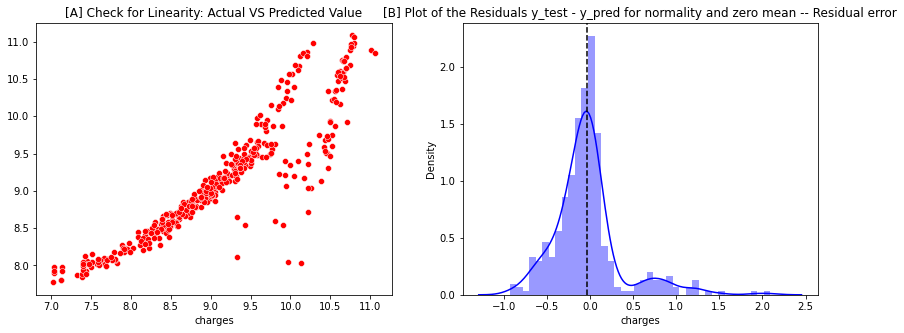

In [145]:
f = plt.figure(figsize = (14, 5))

ax = f.add_subplot(121)
sns.scatterplot(y_test, y_pred, ax=ax, color='r')
ax.set_title('[A] Check for Linearity: Actual VS Predicted Value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred), ax = ax, color='b')
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('[B] Plot of the Residuals y_test - y_pred for normality and zero mean -- Residual error')

We now check for multivariate normality. 

Text(0.5, 1.0, '[D] Check for Homoskedasticity: Residual VS Predicted')

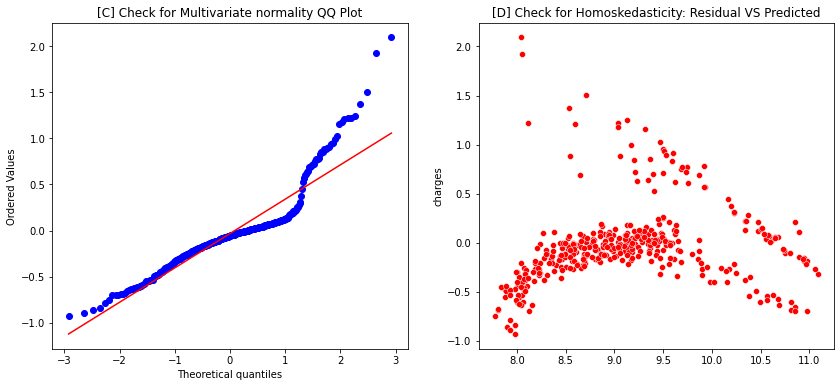

In [146]:
f, ax = plt.subplots(1,2,figsize=(14, 6))

import scipy as sp
_, (_,_,r) = sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('[C] Check for Multivariate normality QQ Plot')

sns.scatterplot(y = (y_test-y_pred), x = y_pred, ax = ax[1], color='r')
ax[1].set_title('[D] Check for Homoskedasticity: Residual VS Predicted')


* On plot [A], we can see that the actual VS predicted plot is linear.
* On plot [B], we can see that the mean of the residuals is zero and that they follow a normal distribution. 
* On plot [C], ?
* On plot [D], we see heteroskedasticity, so the error will increase after a certain point. 
* Below, the VIF is greater than 5, so there is multicollinearity. Shouldn't be. 

In [147]:
VIF = 1/(1-r2)
VIF

5.52595010347105

Most of the notebook is taken from: https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook

<br> 

The statsmodel parts are taken from: 
https://www.kaggle.com/code/rananikhil/diamond-analysis/notebook

### Model Evaluation with statsmodel

In [149]:
df_results = pd.DataFrame(columns=['Description', 'R2', 
                                   'Adjusted_R2', 
                                   'MSE_Model', 
                                   'MSE_Residual'])

description = 'OLS'
r_2 = round(ols.rsquared, 3)
adjr2 = round(ols.rsquared_adj, 3)
msem = round(ols.mse_model, 2)
mser = round(ols.mse_resid, 2)

df_results = pd.concat([df_results, pd.DataFrame(np.array([description, r_2, adjr2, msem, mser]).reshape(1, -1), columns = ['Description', 'R2', 'Adjusted_R2', 'MSE_Model', 'MSE_Residual'])], axis=0)

df_results

,Description,R2,Adjusted_R2,MSE_Model,MSE_Residual
0,OLS,0.738,0.734,8182254059.85,37850397.09


Note: the above is already with log transformation of charges, very different values from notebook.  

<br>
Recall the output of the OLS:

In [150]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     216.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          2.98e-258
Time:                        10:20:30   Log-Likelihood:                -9487.8
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     923   BIC:                         1.906e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age             244.3798     14.414     16.955      0.000     216.093     272.667
bmi             303.5582     34.480      8.804      0.000     235.890     371.226
cat_male       -242.7779    404.345     -0.600      0.548   -1036.320     550.765
cat_1           567.8304    510.166      1.113      0.266    -433.390    1569.051
cat_2          1923.6328    564.964      3.405      0.001     814.870    3032.396
cat_3           629.8040    690.543      0.912      0.362    -725.413    1985.021
cat_4          3526.0317   1411.663      2.498      0.013     755.589    6296.474
cat_5           691.8790   1682.916      0.411      0.681   -2610.907    3994.665
cat_yes        2.368e+04    505.676     46.830      0.000    2.27e+04    2.47e+04
cat_northwest  -161.9170    576.693     -0.281      0.779   -1293.699     969.865
cat_southeast -1096.8967    586.096     -1.872      0.062   -2247.133      53.339
cat_southwest  -860.8045    581.586     -1.480      0.139   -2002.189     280.580
const         -1.038e+04   1208.809     -8.585      0.000   -1.28e+04   -8005.707
==============================================================================
Omnibus:                      202.696   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.860
Skew:                           1.188   Prob(JB):                     9.24e-98
Kurtosis:                       5.411   Cond. No.                         432.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


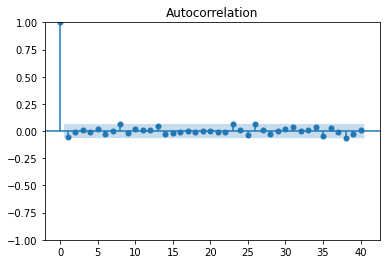

In [156]:
### Durbin Watson is equal to 2 so it means no autocorrelation. 
### Another way to see this is to plot the ACF:

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(ols.resid, lags = 40, alpha = 0.05)
acf.show()

/Users/ruilapuskas/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

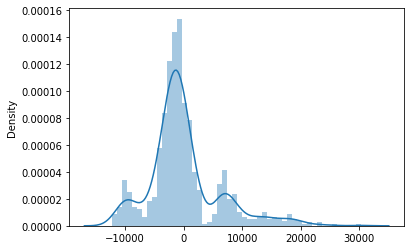

In [158]:
### Jarque Bera tests for Normal Distribution. 

sns.distplot(ols.resid)